In [ ]:
#Author: Jonathan Loyd
#Description: Python3 Using KFold, MultinomialNB, RFC, and GBC on Spam Data
#CSE590-12 Project 3

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from statistics import mean

In [2]:
# Read in Train Data
X = pd.read_csv("X_train.csv")
Y = pd.read_csv("y_train.csv").values.flatten()
X = np.array(X)
print(X.shape)
print(Y.shape)

(24999, 1000)
(24999,)


In [3]:
# Get KFolds
folds = 4
cv = KFold(n_splits=folds)

In [4]:
alpha_vals = np.logspace(-2, 1, num=100)
alpha_vals

array([ 0.01      ,  0.01072267,  0.01149757,  0.01232847,  0.01321941,
        0.01417474,  0.01519911,  0.01629751,  0.01747528,  0.01873817,
        0.02009233,  0.02154435,  0.0231013 ,  0.02477076,  0.02656088,
        0.02848036,  0.03053856,  0.03274549,  0.03511192,  0.03764936,
        0.04037017,  0.04328761,  0.04641589,  0.04977024,  0.05336699,
        0.05722368,  0.06135907,  0.06579332,  0.07054802,  0.07564633,
        0.08111308,  0.0869749 ,  0.09326033,  0.1       ,  0.10722672,
        0.1149757 ,  0.12328467,  0.13219411,  0.14174742,  0.15199111,
        0.16297508,  0.17475284,  0.18738174,  0.2009233 ,  0.21544347,
        0.23101297,  0.24770764,  0.26560878,  0.28480359,  0.30538555,
        0.32745492,  0.35111917,  0.37649358,  0.40370173,  0.43287613,
        0.46415888,  0.49770236,  0.53366992,  0.57223677,  0.61359073,
        0.65793322,  0.70548023,  0.75646333,  0.81113083,  0.869749  ,
        0.93260335,  1.        ,  1.07226722,  1.149757  ,  1.23

In [5]:
# Conduct MultinomialNB with KFold
train_scores = list() 
test_scores = list()
for alpha in alpha_vals:
    clf = MultinomialNB(alpha=alpha)
    i = 1
    train_score = 0
    test_score = 0
    print(alpha)

    for train_index, test_index in cv.split(X):
        X_train, X_test, Y_train, Y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
        clf.fit(X_train, Y_train)
        
        print('Processing Fold #', i)
        print("  - Training score = ", clf.score(X_train, Y_train))
        print("  - Testing score = ", clf.score(X_test, Y_test))
        train_score += clf.score(X_train, Y_train)
        test_score += clf.score(X_test, Y_test)
        
        i += 1
    train_score /= folds
    test_score /= folds
    print(f'Train Score: {train_score}\nValidation Score: {test_score}')
    train_scores.append(train_score)
    test_scores.append(test_score)

0.01
Processing Fold # 1
  - Training score =  0.8381780361619287
  - Testing score =  0.82832
Processing Fold # 2
  - Training score =  0.8358312443330311
  - Testing score =  0.83472
Processing Fold # 3
  - Training score =  0.8374313296709158
  - Testing score =  0.82976
Processing Fold # 4
  - Training score =  0.8363733333333333
  - Testing score =  0.8374139862377981
Train Score: 0.8369534858748022
Validation Score: 0.8325534965594494
0.010722672220103232
Processing Fold # 1
  - Training score =  0.8381780361619287
  - Testing score =  0.82832
Processing Fold # 2
  - Training score =  0.8358312443330311
  - Testing score =  0.83472
Processing Fold # 3
  - Training score =  0.8374313296709158
  - Testing score =  0.82976
Processing Fold # 4
  - Training score =  0.8363733333333333
  - Testing score =  0.8374139862377981
Train Score: 0.8369534858748022
Validation Score: 0.8325534965594494
0.011497569953977356
Processing Fold # 1
  - Training score =  0.8381780361619287
  - Testing 

  - Testing score =  0.82832
Processing Fold # 2
  - Training score =  0.8358312443330311
  - Testing score =  0.83472
Processing Fold # 3
  - Training score =  0.8374313296709158
  - Testing score =  0.82976
Processing Fold # 4
  - Training score =  0.8363733333333333
  - Testing score =  0.8374139862377981
Train Score: 0.8369534858748022
Validation Score: 0.8325534965594494
0.037649358067924674
Processing Fold # 1
  - Training score =  0.8381780361619287
  - Testing score =  0.82832
Processing Fold # 2
  - Training score =  0.8358312443330311
  - Testing score =  0.83472
Processing Fold # 3
  - Training score =  0.8374313296709158
  - Testing score =  0.82976
Processing Fold # 4
  - Training score =  0.8363733333333333
  - Testing score =  0.8374139862377981
Train Score: 0.8369534858748022
Validation Score: 0.8325534965594494
0.040370172585965536
Processing Fold # 1
  - Training score =  0.8381780361619287
  - Testing score =  0.82832
Processing Fold # 2
  - Training score =  0.83583

  - Training score =  0.8381780361619287
  - Testing score =  0.82848
Processing Fold # 2
  - Training score =  0.8357779081551016
  - Testing score =  0.83472
Processing Fold # 3
  - Training score =  0.8374313296709158
  - Testing score =  0.82976
Processing Fold # 4
  - Training score =  0.8363733333333333
  - Testing score =  0.8374139862377981
Train Score: 0.8369401518303199
Validation Score: 0.8325934965594495
0.13219411484660293
Processing Fold # 1
  - Training score =  0.8381780361619287
  - Testing score =  0.82848
Processing Fold # 2
  - Training score =  0.8357779081551016
  - Testing score =  0.83472
Processing Fold # 3
  - Training score =  0.8374313296709158
  - Testing score =  0.82976
Processing Fold # 4
  - Training score =  0.8363733333333333
  - Testing score =  0.8374139862377981
Train Score: 0.8369401518303199
Validation Score: 0.8325934965594495
0.14174741629268056
Processing Fold # 1
  - Training score =  0.8381780361619287
  - Testing score =  0.82848
Processing

Processing Fold # 1
  - Training score =  0.8382313723398581
  - Testing score =  0.82864
Processing Fold # 2
  - Training score =  0.8358312443330311
  - Testing score =  0.83472
Processing Fold # 3
  - Training score =  0.8373246573150568
  - Testing score =  0.82976
Processing Fold # 4
  - Training score =  0.83632
  - Testing score =  0.8372539606337014
Train Score: 0.8369268184969865
Validation Score: 0.8325934901584254
0.464158883361278
Processing Fold # 1
  - Training score =  0.8382313723398581
  - Testing score =  0.82864
Processing Fold # 2
  - Training score =  0.8358312443330311
  - Testing score =  0.83472
Processing Fold # 3
  - Training score =  0.8373246573150568
  - Testing score =  0.82976
Processing Fold # 4
  - Training score =  0.83632
  - Testing score =  0.8372539606337014
Train Score: 0.8369268184969865
Validation Score: 0.8325934901584254
0.49770235643321115
Processing Fold # 1
  - Training score =  0.8382313723398581
  - Testing score =  0.82864
Processing Fol

  - Training score =  0.8373779934929863
  - Testing score =  0.82928
Processing Fold # 4
  - Training score =  0.8362666666666667
  - Testing score =  0.8374139862377981
Train Score: 0.836940153252618
Validation Score: 0.8325134965594494
1.629750834620645
Processing Fold # 1
  - Training score =  0.8381780361619287
  - Testing score =  0.8288
Processing Fold # 2
  - Training score =  0.8359379166888901
  - Testing score =  0.83472
Processing Fold # 3
  - Training score =  0.8374313296709158
  - Testing score =  0.82928
Processing Fold # 4
  - Training score =  0.8362666666666667
  - Testing score =  0.8374139862377981
Train Score: 0.8369534872971003
Validation Score: 0.8325534965594494
1.7475284000076847
Processing Fold # 1
  - Training score =  0.8381780361619287
  - Testing score =  0.8288
Processing Fold # 2
  - Training score =  0.8358845805109606
  - Testing score =  0.83472
Processing Fold # 3
  - Training score =  0.8373779934929863
  - Testing score =  0.82928
Processing Fold 

  - Testing score =  0.82912
Processing Fold # 4
  - Training score =  0.8364266666666667
  - Testing score =  0.8370939350296047
Train Score: 0.836873480896759
Validation Score: 0.8323534837574011
5.72236765935022
Processing Fold # 1
  - Training score =  0.8380180276281401
  - Testing score =  0.82864
Processing Fold # 2
  - Training score =  0.8359379166888901
  - Testing score =  0.8344
Processing Fold # 3
  - Training score =  0.8371646487812683
  - Testing score =  0.82912
Processing Fold # 4
  - Training score =  0.83648
  - Testing score =  0.8372539606337014
Train Score: 0.8369001482745746
Validation Score: 0.8323534901584254
6.135907273413176
Processing Fold # 1
  - Training score =  0.8379113552722812
  - Testing score =  0.82848
Processing Fold # 2
  - Training score =  0.8358845805109606
  - Testing score =  0.83456
Processing Fold # 3
  - Training score =  0.8371646487812683
  - Testing score =  0.82912
Processing Fold # 4
  - Training score =  0.8365333333333334
  - Test

In [6]:
print(max(test_scores))
print(alpha_vals[test_scores.index(max(test_scores))])

0.8326335029604737
0.9326033468832199


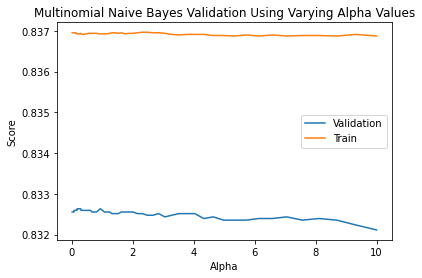

In [7]:
plt.plot(alpha_vals, test_scores, label="Validation")
plt.plot(alpha_vals, train_scores, label="Train")
plt.title('Multinomial Naive Bayes Validation Using Varying Alpha Values')
plt.ylabel('Score')
plt.xlabel('Alpha')
plt.legend()
fig1 = plt.gcf()
plt.show()
fig1.savefig('MultinomialNBfig.jpg')

In [8]:
depth_vals = np.linspace(1, 100, num=10)
depth_vals

array([  1.,  12.,  23.,  34.,  45.,  56.,  67.,  78.,  89., 100.])

In [9]:
# Conduct RFC with KFold varying depth
train_scores = list() 
test_scores = list()
for depth in depth_vals:
    clf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=0)
    i = 1
    train_score = 0
    test_score = 0
    print(depth)

    for train_index, test_index in cv.split(X):
        X_train, X_test, Y_train, Y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
        clf.fit(X_train, Y_train)
        
        print('Processing Fold #', i)
        print("  - Training score = ", clf.score(X_train, Y_train))
        print("  - Testing score = ", clf.score(X_test, Y_test))
        train_score += clf.score(X_train, Y_train)
        test_score += clf.score(X_test, Y_test)
        
        i += 1
    train_score /= folds
    test_score /= folds
    print(f'Train Score: {train_score}\nValidation Score: {test_score}')
    train_scores.append(train_score)
    test_scores.append(test_score)

1.0
Processing Fold # 1
  - Training score =  0.7591338204704251
  - Testing score =  0.7496
Processing Fold # 2
  - Training score =  0.7530001600085338
  - Testing score =  0.76416
Processing Fold # 3
  - Training score =  0.7522001173395915
  - Testing score =  0.74112
Processing Fold # 4
  - Training score =  0.74544
  - Testing score =  0.747799647943671
Train Score: 0.7524435244546376
Validation Score: 0.7506699119859177
12.0
Processing Fold # 1
  - Training score =  0.8828737532668409
  - Testing score =  0.80928
Processing Fold # 2
  - Training score =  0.8806336337938023
  - Testing score =  0.81408
Processing Fold # 3
  - Training score =  0.882233719131687
  - Testing score =  0.80208
Processing Fold # 4
  - Training score =  0.8817066666666666
  - Testing score =  0.8154904784765562
Train Score: 0.8818619432147492
Validation Score: 0.8102326196191391
23.0
Processing Fold # 1
  - Training score =  0.9683183103098832
  - Testing score =  0.81744
Processing Fold # 2
  - Traini

In [10]:
print(max(test_scores), min(test_scores))
print(depth_vals[test_scores.index(max(test_scores))], depth_vals[test_scores.index(min(test_scores))])

0.8221928244519123 0.7506699119859177
45.0 1.0


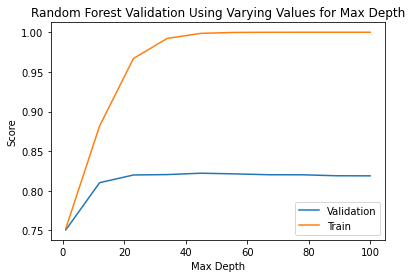

In [11]:
plt.plot(depth_vals, test_scores, label="Validation")
plt.plot(depth_vals, train_scores, label="Train")
plt.title('Random Forest Validation Using Varying Values for Max Depth')
plt.ylabel('Score')
plt.xlabel('Max Depth')
plt.legend()
fig1 = plt.gcf()
plt.show()
fig1.savefig('RandomForestMaxDepthfig.jpg')

In [12]:
max_feature_vals = np.linspace(1, 30, num=10)
max_feature_vals

array([ 1.        ,  4.22222222,  7.44444444, 10.66666667, 13.88888889,
       17.11111111, 20.33333333, 23.55555556, 26.77777778, 30.        ])

In [13]:
# Conduct RFC with KFold varying max features
train_scores = list() 
test_scores = list()
for max_feature in max_feature_vals:
    clf = RandomForestClassifier(max_features=round(max_feature), random_state=0)
    i = 1
    train_score = 0
    test_score = 0
    print(max_feature)

    for train_index, test_index in cv.split(X):
        X_train, X_test, Y_train, Y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
        clf.fit(X_train, Y_train)
        
        print('Processing Fold #', i)
        print("  - Training score = ", clf.score(X_train, Y_train))
        print("  - Testing score = ", clf.score(X_test, Y_test))
        train_score += clf.score(X_train, Y_train)
        test_score += clf.score(X_test, Y_test)
        
        i += 1
    train_score /= folds
    test_score /= folds
    print(f'Train Score: {train_score}\nValidation Score: {test_score}')
    train_scores.append(train_score)
    test_scores.append(test_score)

1.0
Processing Fold # 1
  - Training score =  1.0
  - Testing score =  0.74816
Processing Fold # 2
  - Training score =  1.0
  - Testing score =  0.73808
Processing Fold # 3
  - Training score =  1.0
  - Testing score =  0.7496
Processing Fold # 4
  - Training score =  1.0
  - Testing score =  0.7460393662986078
Train Score: 1.0
Validation Score: 0.7454698415746519
4.222222222222222
Processing Fold # 1
  - Training score =  1.0
  - Testing score =  0.80256
Processing Fold # 2
  - Training score =  1.0
  - Testing score =  0.81392
Processing Fold # 3
  - Training score =  1.0
  - Testing score =  0.804
Processing Fold # 4
  - Training score =  1.0
  - Testing score =  0.8039686349815971
Train Score: 1.0
Validation Score: 0.8061121587453994
7.444444444444445
Processing Fold # 1
  - Training score =  1.0
  - Testing score =  0.8152
Processing Fold # 2
  - Training score =  1.0
  - Testing score =  0.82096
Processing Fold # 3
  - Training score =  1.0
  - Testing score =  0.81056
Processin

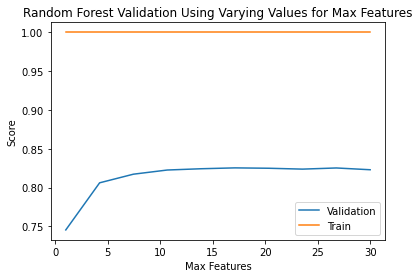

In [14]:
plt.plot(max_feature_vals, test_scores, label="Validation")
plt.plot(max_feature_vals, train_scores, label="Train")
plt.title('Random Forest Validation Using Varying Values for Max Features')
plt.ylabel('Score')
plt.xlabel('Max Features')
plt.legend()
fig1 = plt.gcf()
plt.show()
fig1.savefig('RandomForestMaxFeaturesfig.jpg')

In [15]:
print(max(test_scores), min(test_scores))

0.8253531701072171 0.7454698415746519


In [16]:
max_leaf_vals = np.linspace(500, 2000, num=10)
max_leaf_vals

array([ 500.        ,  666.66666667,  833.33333333, 1000.        ,
       1166.66666667, 1333.33333333, 1500.        , 1666.66666667,
       1833.33333333, 2000.        ])

In [ ]:
# Conduct RFC with KFold varying max leaves
train_scores = list() 
test_scores = list()
for max_leaf in max_leaf_vals:
    clf = RandomForestClassifier(max_leaf_nodes=int(max_leaf), random_state=0)
    i = 1
    train_score = 0
    test_score = 0
    print(int(max_leaf))

    for train_index, test_index in cv.split(X):
        X_train, X_test, Y_train, Y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
        clf.fit(X_train, Y_train)
        
        print('Processing Fold #', i)
        print("  - Training score = ", clf.score(X_train, Y_train))
        print("  - Testing score = ", clf.score(X_test, Y_test))
        train_score += clf.score(X_train, Y_train)
        test_score += clf.score(X_test, Y_test)
        
        i += 1
    train_score /= folds
    test_score /= folds
    print(f'Train Score: {train_score}\nValidation Score: {test_score}')
    train_scores.append(train_score)
    test_scores.append(test_score)

In [ ]:
plt.plot(max_leaf_vals, test_scores, label="Validation")
plt.plot(max_leaf_vals, train_scores, label="Train")
plt.title('Random Forest Validation Using Varying Values for Max Leaf Nodes')
plt.ylabel('Score')
plt.xlabel('Max Leaf Nodes')
plt.legend()
fig1 = plt.gcf()
plt.show()
fig1.savefig('RandomForestMaxLeafsfig.jpg')

In [ ]:
print(max(test_scores), min(test_scores))

In [ ]:
depth_vals = np.linspace(43, 47, num=5)
max_feature_vals = np.linspace(13, 17, num=5)
print(depth_vals, max_feature_vals)

In [ ]:
# Conduct RFC with KFold varying depth and feature vals at the same time
train_scores = list() 
test_scores = list()
for depth in depth_vals:
    for max_feature in max_feature_vals:
        print(f'Depth: {depth}, Max Features: {max_feature}')
        clf = RandomForestClassifier(max_features=int(max_feature), max_depth=int(depth), max_leaf_nodes=1666, random_state=0)
        i = 1
        train_score = 0
        test_score = 0
        for train_index, test_index in cv.split(X):
            X_train, X_test, Y_train, Y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
            clf.fit(X_train, Y_train)

            print('Processing Fold #', i)
            print("  - Training score = ", clf.score(X_train, Y_train))
            print("  - Testing score = ", clf.score(X_test, Y_test))
            train_score += clf.score(X_train, Y_train)
            test_score += clf.score(X_test, Y_test)

            i += 1
        train_score /= folds
        test_score /= folds
        print(f'Train Score: {train_score}\nValidation Score: {test_score}')
        train_scores.append(train_score)
        test_scores.append(test_score)

In [ ]:
print(max(test_scores))
print(test_scores)
numpy_ts = np.array(train_scores)
numpy_ts = np.resize(numpy_ts, (len(depth_vals),len(max_feature_vals)))
# print(numpy_ts)
depth_list = list()
feature_list = list()
for depth in depth_vals:
    depth_list.append(f'Depth {int(depth)}')
for feature in max_feature_vals:
    feature_list.append(f'Features {int(feature)}')
# print(depth_list)
# print(feature_list)

df = pd.DataFrame(numpy_ts,
                 index=depth_list,
                 columns=feature_list)
print(df)
# df.to_csv('RandomForestDepthFeaturesChangedLN2.csv')

In [ ]:
print(min(test_scores))

In [ ]:
depth_vals = np.linspace(5, 8, num=5)
depth_vals

In [ ]:
# Conduct GBC with KFold varying depth
train_scores = list() 
test_scores = list()
for depth in depth_vals:
    clf = GradientBoostingClassifier(max_depth=int(depth), random_state=0)
    i = 1
    train_score = 0
    test_score = 0
    print(depth)

    for train_index, test_index in cv.split(X):
        X_train, X_test, Y_train, Y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
        clf.fit(X_train, Y_train)
        
        print('Processing Fold #', i)
        print("  - Training score = ", clf.score(X_train, Y_train))
        print("  - Testing score = ", clf.score(X_test, Y_test))
        train_score += clf.score(X_train, Y_train)
        test_score += clf.score(X_test, Y_test)
        
        i += 1
    train_score /= folds
    test_score /= folds
    print(f'Train Score: {train_score}\nValidation Score: {test_score}')
    train_scores.append(train_score)
    test_scores.append(test_score)

In [ ]:
plt.plot(depth_vals, test_scores, label="Validation")
plt.plot(depth_vals, train_scores, label="Train")
plt.title('Gradient Boosting Classifier Using Varying Values for Max Depth')
plt.ylabel('Score')
plt.xlabel('Max Depth')
plt.legend()
fig1 = plt.gcf()
plt.show()
fig1.savefig('GradientBoostingMaxDepthfig.jpg')

In [ ]:
max_leaf_nodes_vals = np.linspace(2, 15, num=5)
max_leaf_nodes_vals

In [ ]:
# Conduct GBC with KFold varying max leaf nodes
train_scores = list() 
test_scores = list()
for max_leaf_nodes in max_leaf_nodes_vals:
    clf = GradientBoostingClassifier(max_leaf_nodes=int(max_leaf_nodes), random_state=0)
    i = 1
    train_score = 0
    test_score = 0
    print(int(max_leaf_nodes))

    for train_index, test_index in cv.split(X):
        X_train, X_test, Y_train, Y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
        clf.fit(X_train, Y_train)
        
        print('Processing Fold #', i)
        print("  - Training score = ", clf.score(X_train, Y_train))
        print("  - Testing score = ", clf.score(X_test, Y_test))
        train_score += clf.score(X_train, Y_train)
        test_score += clf.score(X_test, Y_test)
        
        i += 1
    train_score /= folds
    test_score /= folds
    print(f'Train Score: {train_score}\nValidation Score: {test_score}')
    train_scores.append(train_score)
    test_scores.append(test_score)

In [ ]:
plt.plot(max_leaf_nodes_vals, test_scores, label="Validation")
plt.plot(max_leaf_nodes_vals, train_scores, label="Train")
plt.title('Gradient Boosting Classifier Using Varying Values for Max Leaf Nodes')
plt.ylabel('Score')
plt.xlabel('Max Leaf Nodes')
plt.legend()
fig1 = plt.gcf()
plt.show()
fig1.savefig('GradientBoostingMaxLeafNodesfig.jpg')

In [ ]:
min_samples_leaf_vals = np.linspace(1, 1000, num=5)
min_samples_leaf_vals

In [ ]:
# Conduct GBC with KFold varying min leaf samples
train_scores = list() 
test_scores = list()
for min_samples_leaf in min_samples_leaf_vals:
    clf = GradientBoostingClassifier(min_samples_leaf=int(min_samples_leaf), random_state=0)
    i = 1
    train_score = 0
    test_score = 0
    print(int(min_samples_leaf))

    for train_index, test_index in cv.split(X):
        X_train, X_test, Y_train, Y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
        clf.fit(X_train, Y_train)
        
        print('Processing Fold #', i)
        print("  - Training score = ", clf.score(X_train, Y_train))
        print("  - Testing score = ", clf.score(X_test, Y_test))
        train_score += clf.score(X_train, Y_train)
        test_score += clf.score(X_test, Y_test)
        
        i += 1
    train_score /= folds
    test_score /= folds
    print(f'Train Score: {train_score}\nValidation Score: {test_score}')
    train_scores.append(train_score)
    test_scores.append(test_score)

In [ ]:
plt.plot(min_samples_leaf_vals, test_scores, label="Validation")
plt.plot(min_samples_leaf_vals, train_scores, label="Train")
plt.title('Gradient Boosting Classifier Using Varying Values for Min Leaf Samples')
plt.ylabel('Score')
plt.xlabel('Min Leaf Samples')
plt.legend()
fig1 = plt.gcf()
plt.show()
fig1.savefig('GradientBoostingMinSamplesLeaffig.jpg')

In [ ]:
n_estimators_vals = np.linspace(1, 200, num = 5)
n_estimators_vals

In [ ]:
# Conduct GBC with KFold varying n_estimators
train_scores = list() 
test_scores = list()
for n_estimators in n_estimators_vals:
    clf = GradientBoostingClassifier(n_estimators=int(n_estimators), random_state=0)
    i = 1
    train_score = 0
    test_score = 0
    print(int(n_estimators))

    for train_index, test_index in cv.split(X):
        X_train, X_test, Y_train, Y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
        clf.fit(X_train, Y_train)
        
        print('Processing Fold #', i)
        print("  - Training score = ", clf.score(X_train, Y_train))
        print("  - Testing score = ", clf.score(X_test, Y_test))
        train_score += clf.score(X_train, Y_train)
        test_score += clf.score(X_test, Y_test)
        
        i += 1
    train_score /= folds
    test_score /= folds
    print(f'Train Score: {train_score}\nValidation Score: {test_score}')
    train_scores.append(train_score)
    test_scores.append(test_score)

In [ ]:
learning_rate_vals = np.linspace(.3, .75, num=5)
learning_rate_vals

In [ ]:
# Conduct GBC with KFold varying learning rate
train_scores = list() 
test_scores = list()
for learning_rate in learning_rate_vals:
    clf = GradientBoostingClassifier(learning_rate=learning_rate, max_depth=5, random_state=0)
    i = 1
    train_score = 0
    test_score = 0
    print(learning_rate)

    for train_index, test_index in cv.split(X):
        X_train, X_test, Y_train, Y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
        clf.fit(X_train, Y_train)
        
        print('Processing Fold #', i)
        print("  - Training score = ", clf.score(X_train, Y_train))
        print("  - Testing score = ", clf.score(X_test, Y_test))
        train_score += clf.score(X_train, Y_train)
        test_score += clf.score(X_test, Y_test)
        
        i += 1
    train_score /= folds
    test_score /= folds
    print(f'Train Score: {train_score}\nValidation Score: {test_score}')
    train_scores.append(train_score)
    test_scores.append(test_score)

In [ ]:
plt.plot(learning_rate_vals, test_scores, label="Validation")
plt.plot(learning_rate_vals, train_scores, label="Train")
plt.title('Gradient Boosting Classifier Using Varying Values for Learning Rate')
plt.ylabel('Score')
plt.xlabel('Learning Rate')
plt.legend()
fig1 = plt.gcf()
plt.show()
fig1.savefig('GradientBoostingLearningRatefig.jpg')

In [ ]:
# Conduct GBC with KFold varying n_estimators
train_scores = list() 
test_scores = list()
for n_estimators in n_estimators_vals:
    clf = GradientBoostingClassifier(learning_rate=.525, n_estimators=int(n_estimators), random_state=0)
    i = 1
    train_score = 0
    test_score = 0
    print(int(n_estimators))

    for train_index, test_index in cv.split(X):
        X_train, X_test, Y_train, Y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
        clf.fit(X_train, Y_train)

        print('Processing Fold #', i)
        print("  - Training score = ", clf.score(X_train, Y_train))
        print("  - Testing score = ", clf.score(X_test, Y_test))
        train_score += clf.score(X_train, Y_train)
        test_score += clf.score(X_test, Y_test)

        i += 1
    train_score /= folds
    test_score /= folds
    print(f'Train Score: {train_score}\nValidation Score: {test_score}')
    train_scores.append(train_score)
    test_scores.append(test_score)

In [ ]:
# Conducting best MNB on train data
clf = MultinomialNB(alpha=1)
i = 1
train_score = 0
test_score = 0

for train_index, test_index in cv.split(X):
    X_train, X_test, Y_train, Y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    clf.fit(X_train, Y_train)

    print('Processing Fold #', i)
    print("  - Training score = ", clf.score(X_train, Y_train))
    print("  - Testing score = ", clf.score(X_test, Y_test))
    train_score += clf.score(X_train, Y_train)
    test_score += clf.score(X_test, Y_test)

    i += 1
train_score /= folds
test_score /= folds
print(f'Train Score: {train_score}\nValidation Score: {test_score}')
train_scores.append(train_score)
test_scores.append(test_score)

In [79]:
# Getting Train and Test data
X_train = pd.read_csv("X_train.csv")
Y_train = pd.read_csv("y_train.csv").values.flatten()
X_train = np.array(X_train)
X_test = pd.read_csv("X_test.csv")
Y_test = pd.read_csv("y_test.csv").values.flatten()
X_test = np.array(X_test)

In [165]:
# Conduct best MNB on test data
clf = MultinomialNB(alpha=1)
clf.fit(X_train, Y_train)
print("  - Training score = ", clf.score(X_train, Y_train))
print("  - Testing score = ", clf.score(X_test, Y_test))

  - Training score =  0.8357134285371415
  - Testing score =  0.8322732909316373


In [166]:
# print(clf.predict(X_test))
# neg_class_prob_sorted = clf.feature_log_prob_[0, :].argsort()[::-1]
# pos_class_prob_sorted = clf.feature_log_prob_[1, :].argsort()[::-1]

# neg_proba = clf.predict_proba(X_test)[::, 0]
# pos_proba = clf.predict_proba(X_test)[::, 1]

# print(np.where(pos_proba>=.99999999))

# print("negative sample features")
# for i in np.where(neg_proba>=.99999999999999):
#     for j in neg_class_prob_sorted[:20]:
#         print(X_test[i,j])
# print("positive sample features")
# for i in np.where(pos_proba>=.99999999999):
#     for j in pos_class_prob_sorted[:10]:
#         print(X_test[i,j])

In [175]:
# Getting MNB miscassified samples
Y_pred = clf.predict(X_test)
misclassified_indices = np.where((Y_pred!=Y_test))[0]
k = 3
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X_train)
distances, indices = nn.kneighbors(X_test[misclassified_indices])

In [203]:
columns = ["Misclassified Test idx", "True Class", "Pred Class"]
for i in range(k):
    columns+= ["Neigbor#{}_idx".format(i+1), "Neigbor#{}_True Class".format(i+1), "Neigbor#{}_Distance".format(i+1)]

df = pd.DataFrame(columns = columns)

df["Misclassified Test idx"] = misclassified_indices
df["True Class"] =  Y_test[misclassified_indices]
df["Pred Class"] = Y_pred[misclassified_indices]
for i in range(k):
    df["Neigbor#{}_idx".format(i+1)] = indices[:,i]
    df["Neigbor#{}_True Class".format(i+1)] = Y_train[indices[:,i]]
    df["Neigbor#{}_Distance".format(i+1)] = np.around(distances[:,i], decimals=2)
df.head(50)

,Misclassified Test idx,True Class,Pred Class,Neigbor#1_idx,Neigbor#1_True Class,Neigbor#1_Distance,Neigbor#2_idx,Neigbor#2_True Class,Neigbor#2_Distance,Neigbor#3_idx,Neigbor#3_True Class,Neigbor#3_Distance
0,3,1.0,0.0,10769,1.0,7.14,14151,1.0,7.21,15028,0.0,7.28
1,4,1.0,0.0,22376,1.0,7.28,18830,0.0,7.35,22542,0.0,7.35
2,7,0.0,1.0,418,1.0,7.28,24990,1.0,7.35,4695,0.0,7.42
3,16,0.0,1.0,922,1.0,8.43,6225,1.0,8.43,23019,0.0,8.43
4,24,1.0,0.0,14985,0.0,10.20,2536,0.0,10.30,8644,1.0,10.30
5,25,0.0,1.0,9989,1.0,9.59,690,1.0,9.75,8003,1.0,9.75
6,26,1.0,0.0,24137,1.0,7.94,23068,1.0,8.00,7101,0.0,8.06
7,30,1.0,0.0,15201,1.0,7.55,6236,1.0,7.62,8183,1.0,7.62
8,31,0.0,1.0,6161,1.0,7.81,19892,0.0,7.81,2176,1.0,7.94
9,33,0.0,1.0,10736,1.0,6.24,19387,0.0,6.32,13878,0.0,6.40


In [190]:
# Best sample features and probabilities
neg_class_prob_sorted = clf.feature_log_prob_[0, :].argsort()[::-1]
pos_class_prob_sorted = clf.feature_log_prob_[1, :].argsort()[::-1]

neg_proba = clf.predict_proba(X_test)[::, 0]
pos_proba = clf.predict_proba(X_test)[::, 1]

print(clf.feature_log_prob_[1, :].argsort()[::-1][:20])

# print(np.where(neg_proba>.9999999999999))

print("negative sample features")
for i in neg_proba.argsort()[-10:][::-1]:
    print(i)
    for j in pos_class_prob_sorted.argsort()[::-1][:20]:
        print(X_test[i, j], end=', ')
    print()
print("positive sample features")
for i in pos_proba.argsort()[-10:][::-1]:
    print(i)
    for j in pos_class_prob_sorted.argsort()[::-1][:20]:
        print(X_test[i, j], end=', ')
    print()

[ 1  2  4  5  6  7  8  9 11 14 12 15 13 18 19 21 17 23 16 10]
negative sample features
23114
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 
12236
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 
23427
0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 
11149
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 
3857
0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
17823
0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
16786
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
18726
0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
1278
0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [208]:
print(Y_test[296])
print(Y_pred[296])
for i in pos_class_prob_sorted.argsort()[::-1][:20]:
        print(X_test[296, i], end=', ')

0.0
1.0
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 

In [188]:
print(Y_test[3])
print(Y_pred[3])
for i in neg_class_prob_sorted.argsort()[::-1][:20]:
        print(X_test[3, i], end=', ')

1.0
0.0
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [177]:
print(df["Neigbor#1_Distance"].mean())
idx = 1512
print("Test sample {} is misclassified.".format(misclassified_indices[idx]))
print("True class: {}".format(Y_test[misclassified_indices][idx]))
print("Predicted class: {}".format(Y_pred[misclassified_indices][idx]))
for i in range(k):
    print("Neighbor#{}: Train index {} ; True Class {} ; Distance {:.2f}".format(i+1, indices[idx,i], Y_train[indices[idx,i]], distances[idx, i]))

8.682714047221594
Test sample 9125 is misclassified.
True class: 0.0
Predicted class: 1.0
Neighbor#1: Train index 20937 ; True Class 0.0 ; Distance 9.17
Neighbor#2: Train index 3589 ; True Class 0.0 ; Distance 9.22
Neighbor#3: Train index 12704 ; True Class 1.0 ; Distance 9.22


In [51]:
# Run best RFC on Testing Data
clf = RandomForestClassifier(max_leaf_nodes=1666, max_features=15, max_depth=46, random_state=0, n_jobs=6)
clf.fit(X_train, Y_train)
print("  - Training score = ", clf.score(X_train, Y_train))
print("  - Testing score = ", clf.score(X_test, Y_test))

  - Training score =  0.97011880475219
  - Testing score =  0.8318332733309333


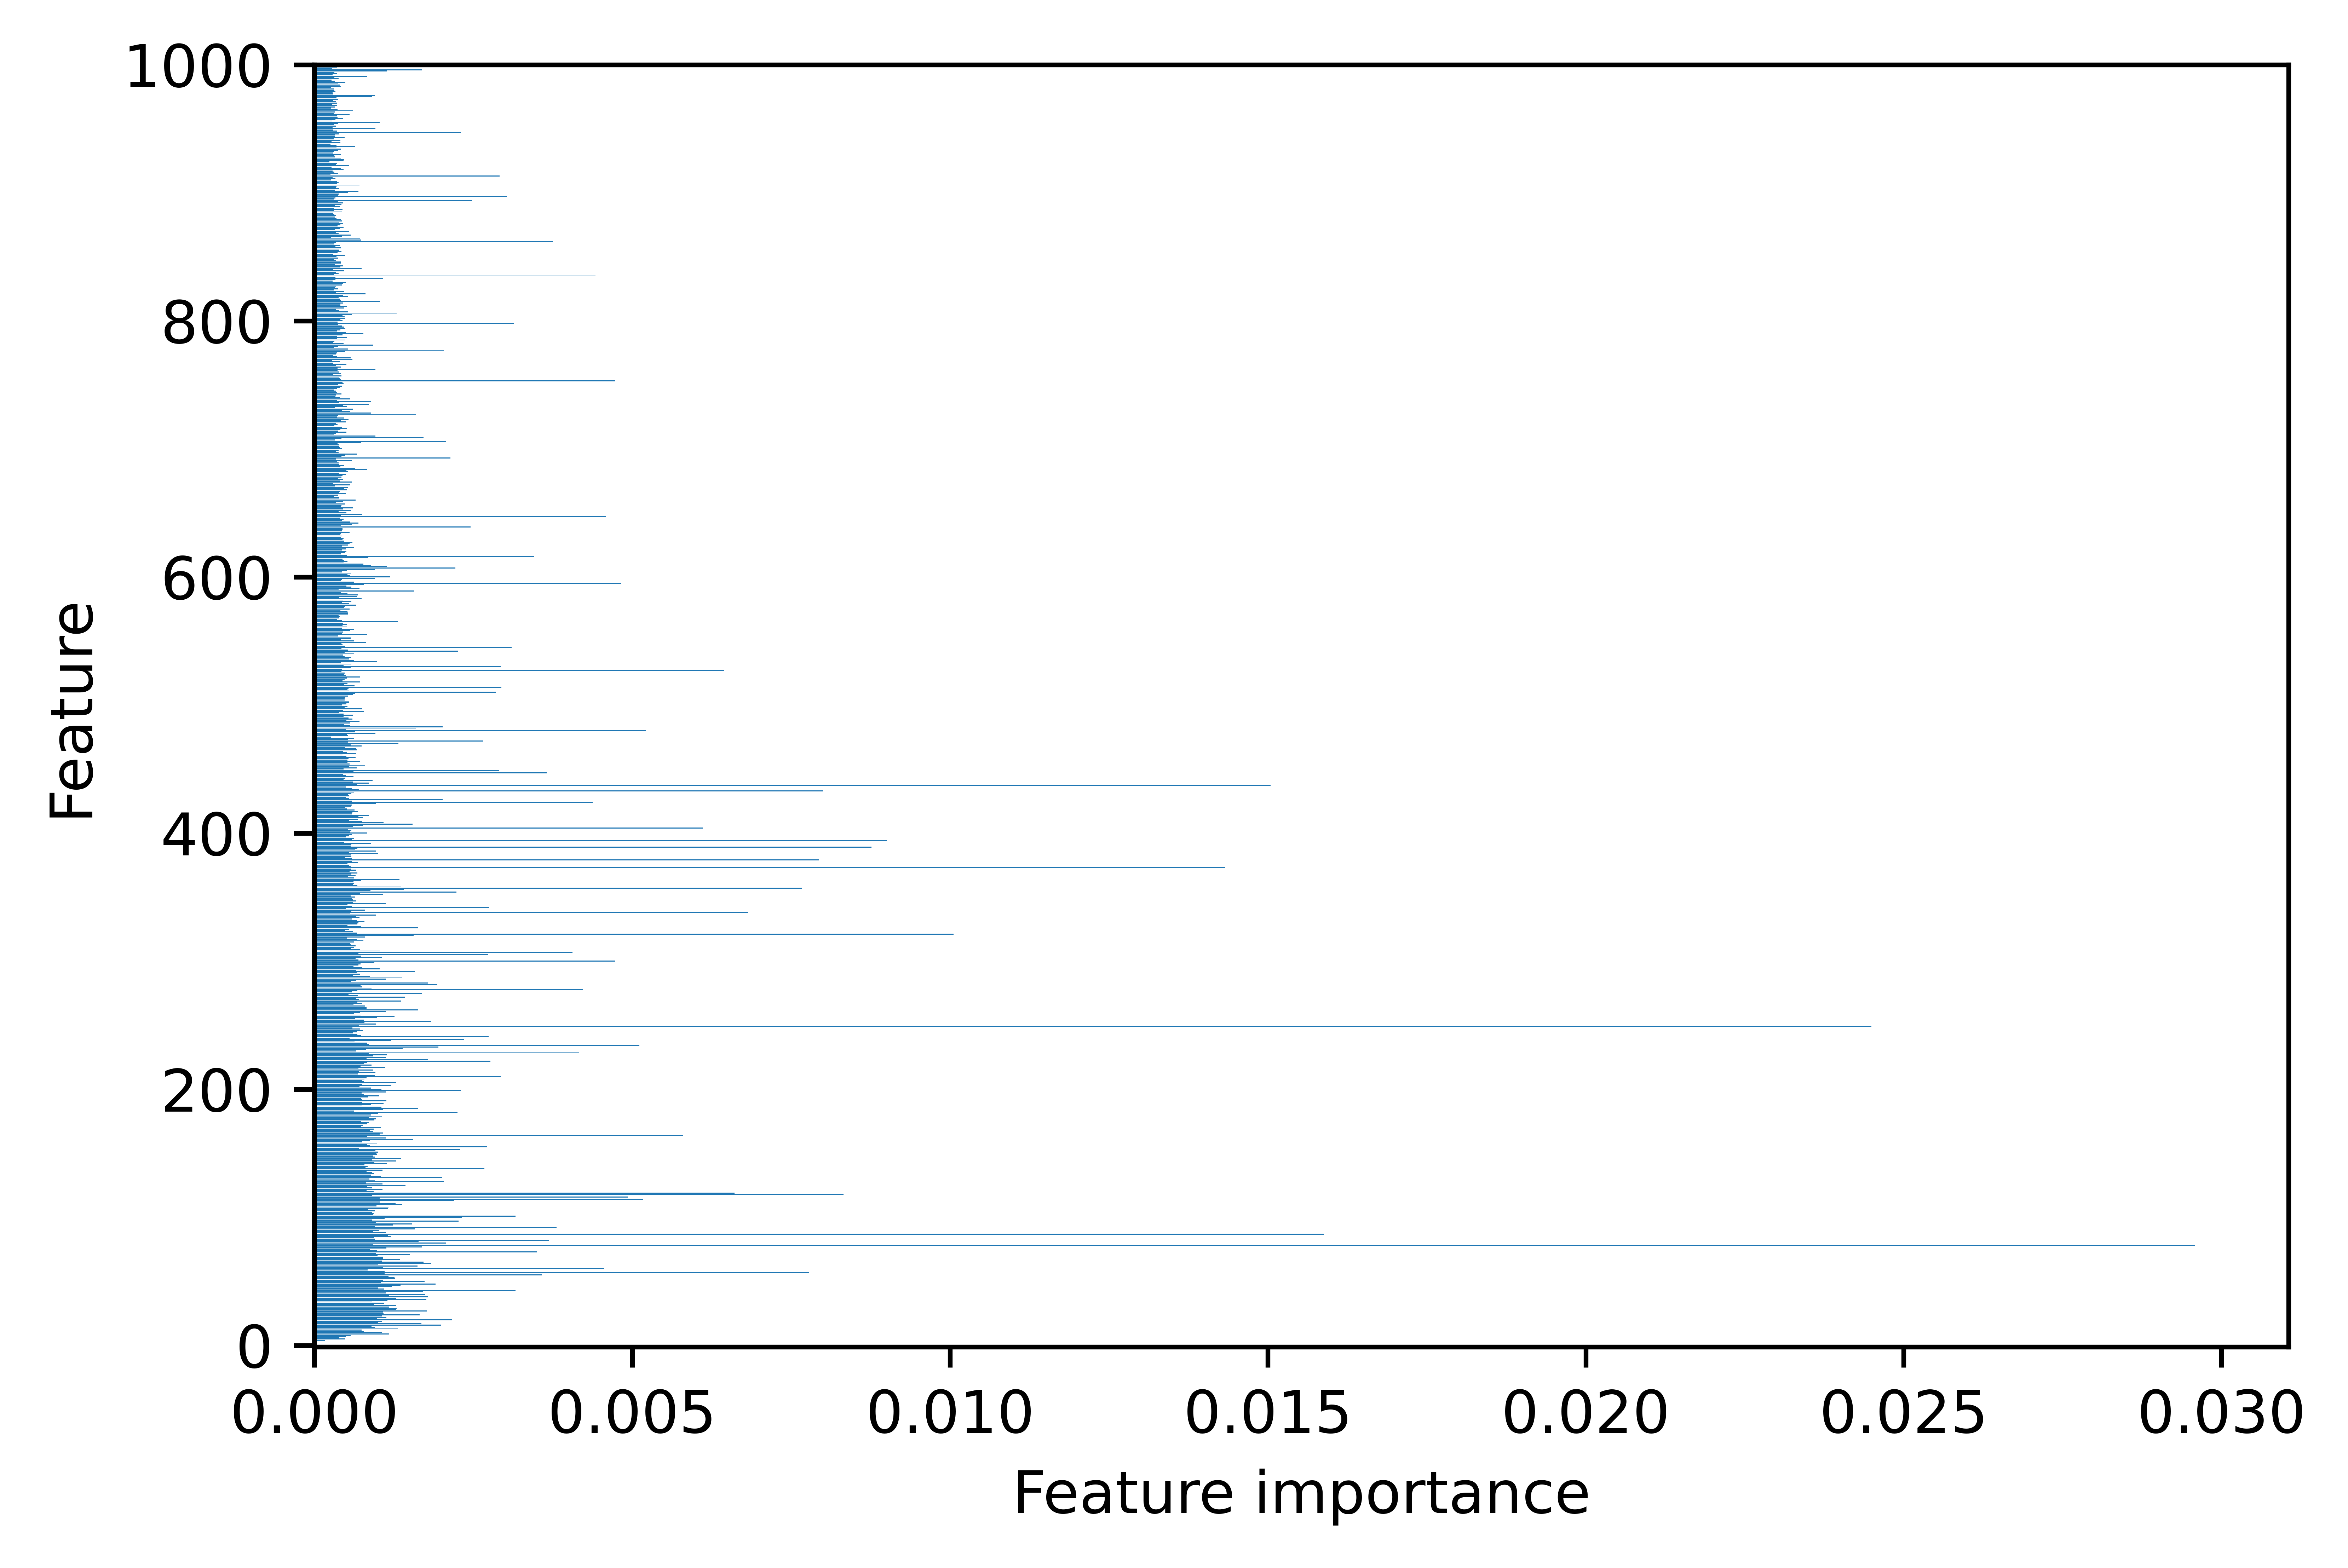

In [52]:
# Get most prominent features for RFC
n_features = X_train.shape[1]
plt.figure(dpi=1200)
plt.barh(range(n_features), clf.feature_importances_)
plt.xlabel ("Feature importance")
plt.ylabel("Feature") 
plt.ylim(-1, n_features)
fig1 = plt.gcf()
plt.show()
fig1.savefig('RandomForestFeatureImportance.jpg')

In [53]:
# Get top feature importances
clf.feature_importances_.argsort()[-5:][::-1]

array([ 78, 249,  87, 437, 373], dtype=int64)

In [54]:
# Get misclassified samples
Y_pred = clf.predict(X_test)
misclassified_indices = np.where((Y_pred!=Y_test))[0]
k = 3
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X_train)
distances, indices = nn.kneighbors(X_test[misclassified_indices])

In [72]:
columns = ["Misclassified Test idx", "True Class", "Pred Class"]
for i in range(k):
    columns+= ["Neigbor#{}_idx".format(i+1), "Neigbor#{}_True Class".format(i+1), "Neigbor#{}_Distance".format(i+1)]

df = pd.DataFrame(columns = columns)

df["Misclassified Test idx"] = misclassified_indices
df["True Class"] =  Y_test[misclassified_indices]
df["Pred Class"] = Y_pred[misclassified_indices]
for i in range(k):
    df["Neigbor#{}_idx".format(i+1)] = indices[:,i]
    df["Neigbor#{}_True Class".format(i+1)] = Y_train[indices[:,i]]
    df["Neigbor#{}_Distance".format(i+1)] = np.around(distances[:,i], decimals=2)
df.head(30)

,Misclassified Test idx,True Class,Pred Class,Neigbor#1_idx,Neigbor#1_True Class,Neigbor#1_Distance,Neigbor#2_idx,Neigbor#2_True Class,Neigbor#2_Distance,Neigbor#3_idx,Neigbor#3_True Class,Neigbor#3_Distance
0,2,0.0,1.0,5459,0.0,9.22,2176,1.0,9.27,10811,1.0,9.27
1,7,0.0,1.0,418,1.0,7.28,24990,1.0,7.35,4695,0.0,7.42
2,16,0.0,1.0,922,1.0,8.43,6225,1.0,8.43,23019,0.0,8.43
3,25,0.0,1.0,9989,1.0,9.59,690,1.0,9.75,8003,1.0,9.75
4,31,0.0,1.0,6161,1.0,7.81,19892,0.0,7.81,2176,1.0,7.94
5,33,0.0,1.0,10736,1.0,6.24,19387,0.0,6.32,13878,0.0,6.40
6,50,0.0,1.0,11520,1.0,7.14,11001,1.0,7.35,9470,1.0,7.42
7,54,1.0,0.0,6944,1.0,9.11,18056,0.0,9.11,1820,1.0,9.22
8,62,0.0,1.0,24990,1.0,8.77,12668,0.0,8.89,11047,1.0,8.94
9,79,1.0,0.0,418,1.0,8.19,10596,0.0,8.25,8450,1.0,8.31


In [56]:
print(df["Neigbor#1_Distance"].mean())
idx = 4200
print("Test sample {} is misclassified.".format(misclassified_indices[idx]))
print("True class: {}".format(Y_test[misclassified_indices][idx]))
print("Predicted class: {}".format(Y_pred[misclassified_indices][idx]))
for i in range(k):
    print("Neighbor#{}: Train index {} ; True Class {} ; Distance {:.2f}".format(i+1, indices[idx,i], Y_train[indices[idx,i]], distances[idx, i]))

8.792961465271203
Test sample 24980 is misclassified.
True class: 1.0
Predicted class: 0.0
Neighbor#1: Train index 13354 ; True Class 1.0 ; Distance 11.45
Neighbor#2: Train index 15970 ; True Class 1.0 ; Distance 11.45
Neighbor#3: Train index 2361 ; True Class 1.0 ; Distance 11.49


In [58]:
# Samples and their most prominent features for comparison
feature_array = clf.feature_importances_.argsort()[-10:][::-1]

neg_proba = clf.predict_proba(X_test)[::, 0]
pos_proba = clf.predict_proba(X_test)[::, 1]

print(neg_proba)
print(pos_proba)

print(feature_array)
print("negative sample features")
for i in neg_proba.argsort()[-10:][::-1]:
    print(i)
    for j in clf.feature_importances_.argsort()[-10:][::-1]:
        print(X_test[i, j], end=', ')
    print()
print("positive sample features")
for i in pos_proba.argsort()[-10:][::-1]:
    print(i)
    for j in clf.feature_importances_.argsort()[-10:][::-1]:
        print(X_test[i, j], end=', ')
    print()

[0.31911759 0.47955697 0.37060086 ... 0.62469756 0.66549108 0.57495126]
[0.68088241 0.52044303 0.62939914 ... 0.37530244 0.33450892 0.42504874]
[ 78 249  87 437 373 321 394 389 118 433]
negative sample features
22162
1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 
21544
1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 
5367
1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
23167
1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
16344
0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
24545
1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
5363
1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 
17324
0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 
23121
1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 
20595
1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 
positive sample features
11577
0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 
2309
0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 
12120
0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 
23726
0.0, 0.0, 1.0, 0.0, 

In [78]:
print(Y_test[86])
for i in clf.feature_importances_.argsort()[-10:][::-1]:
        print(X_test[145, i], end=', ')


1.0
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [ ]:
# Conduct best GBC on Training Data
train_scores = list() 
test_scores = list()

clf = GradientBoostingClassifier(learning_rate=.4125, n_estimators=100, max_depth=5, random_state=0)
i = 1
train_score = 0
test_score = 0

for train_index, test_index in cv.split(X):
    X_train, X_test, Y_train, Y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    clf.fit(X_train, Y_train)

    print('Processing Fold #', i)
    print("  - Training score = ", clf.score(X_train, Y_train))
    print("  - Testing score = ", clf.score(X_test, Y_test))
    train_score += clf.score(X_train, Y_train)
    test_score += clf.score(X_test, Y_test)

    i += 1
train_score /= folds
test_score /= folds
print(f'Train Score: {train_score}\nValidation Score: {test_score}')
train_scores.append(train_score)
test_scores.append(test_score)

In [8]:
# Conduct best GBC on Testing Data
clf = GradientBoostingClassifier(learning_rate=.4125, n_estimators=100, max_depth=5, random_state=0)
clf.fit(X_train, Y_train)
print("  - Training score = ", clf.score(X_train, Y_train))
print("  - Testing score = ", clf.score(X_test, Y_test))

  - Training score =  0.9445577823112925
  - Testing score =  0.843433737349494


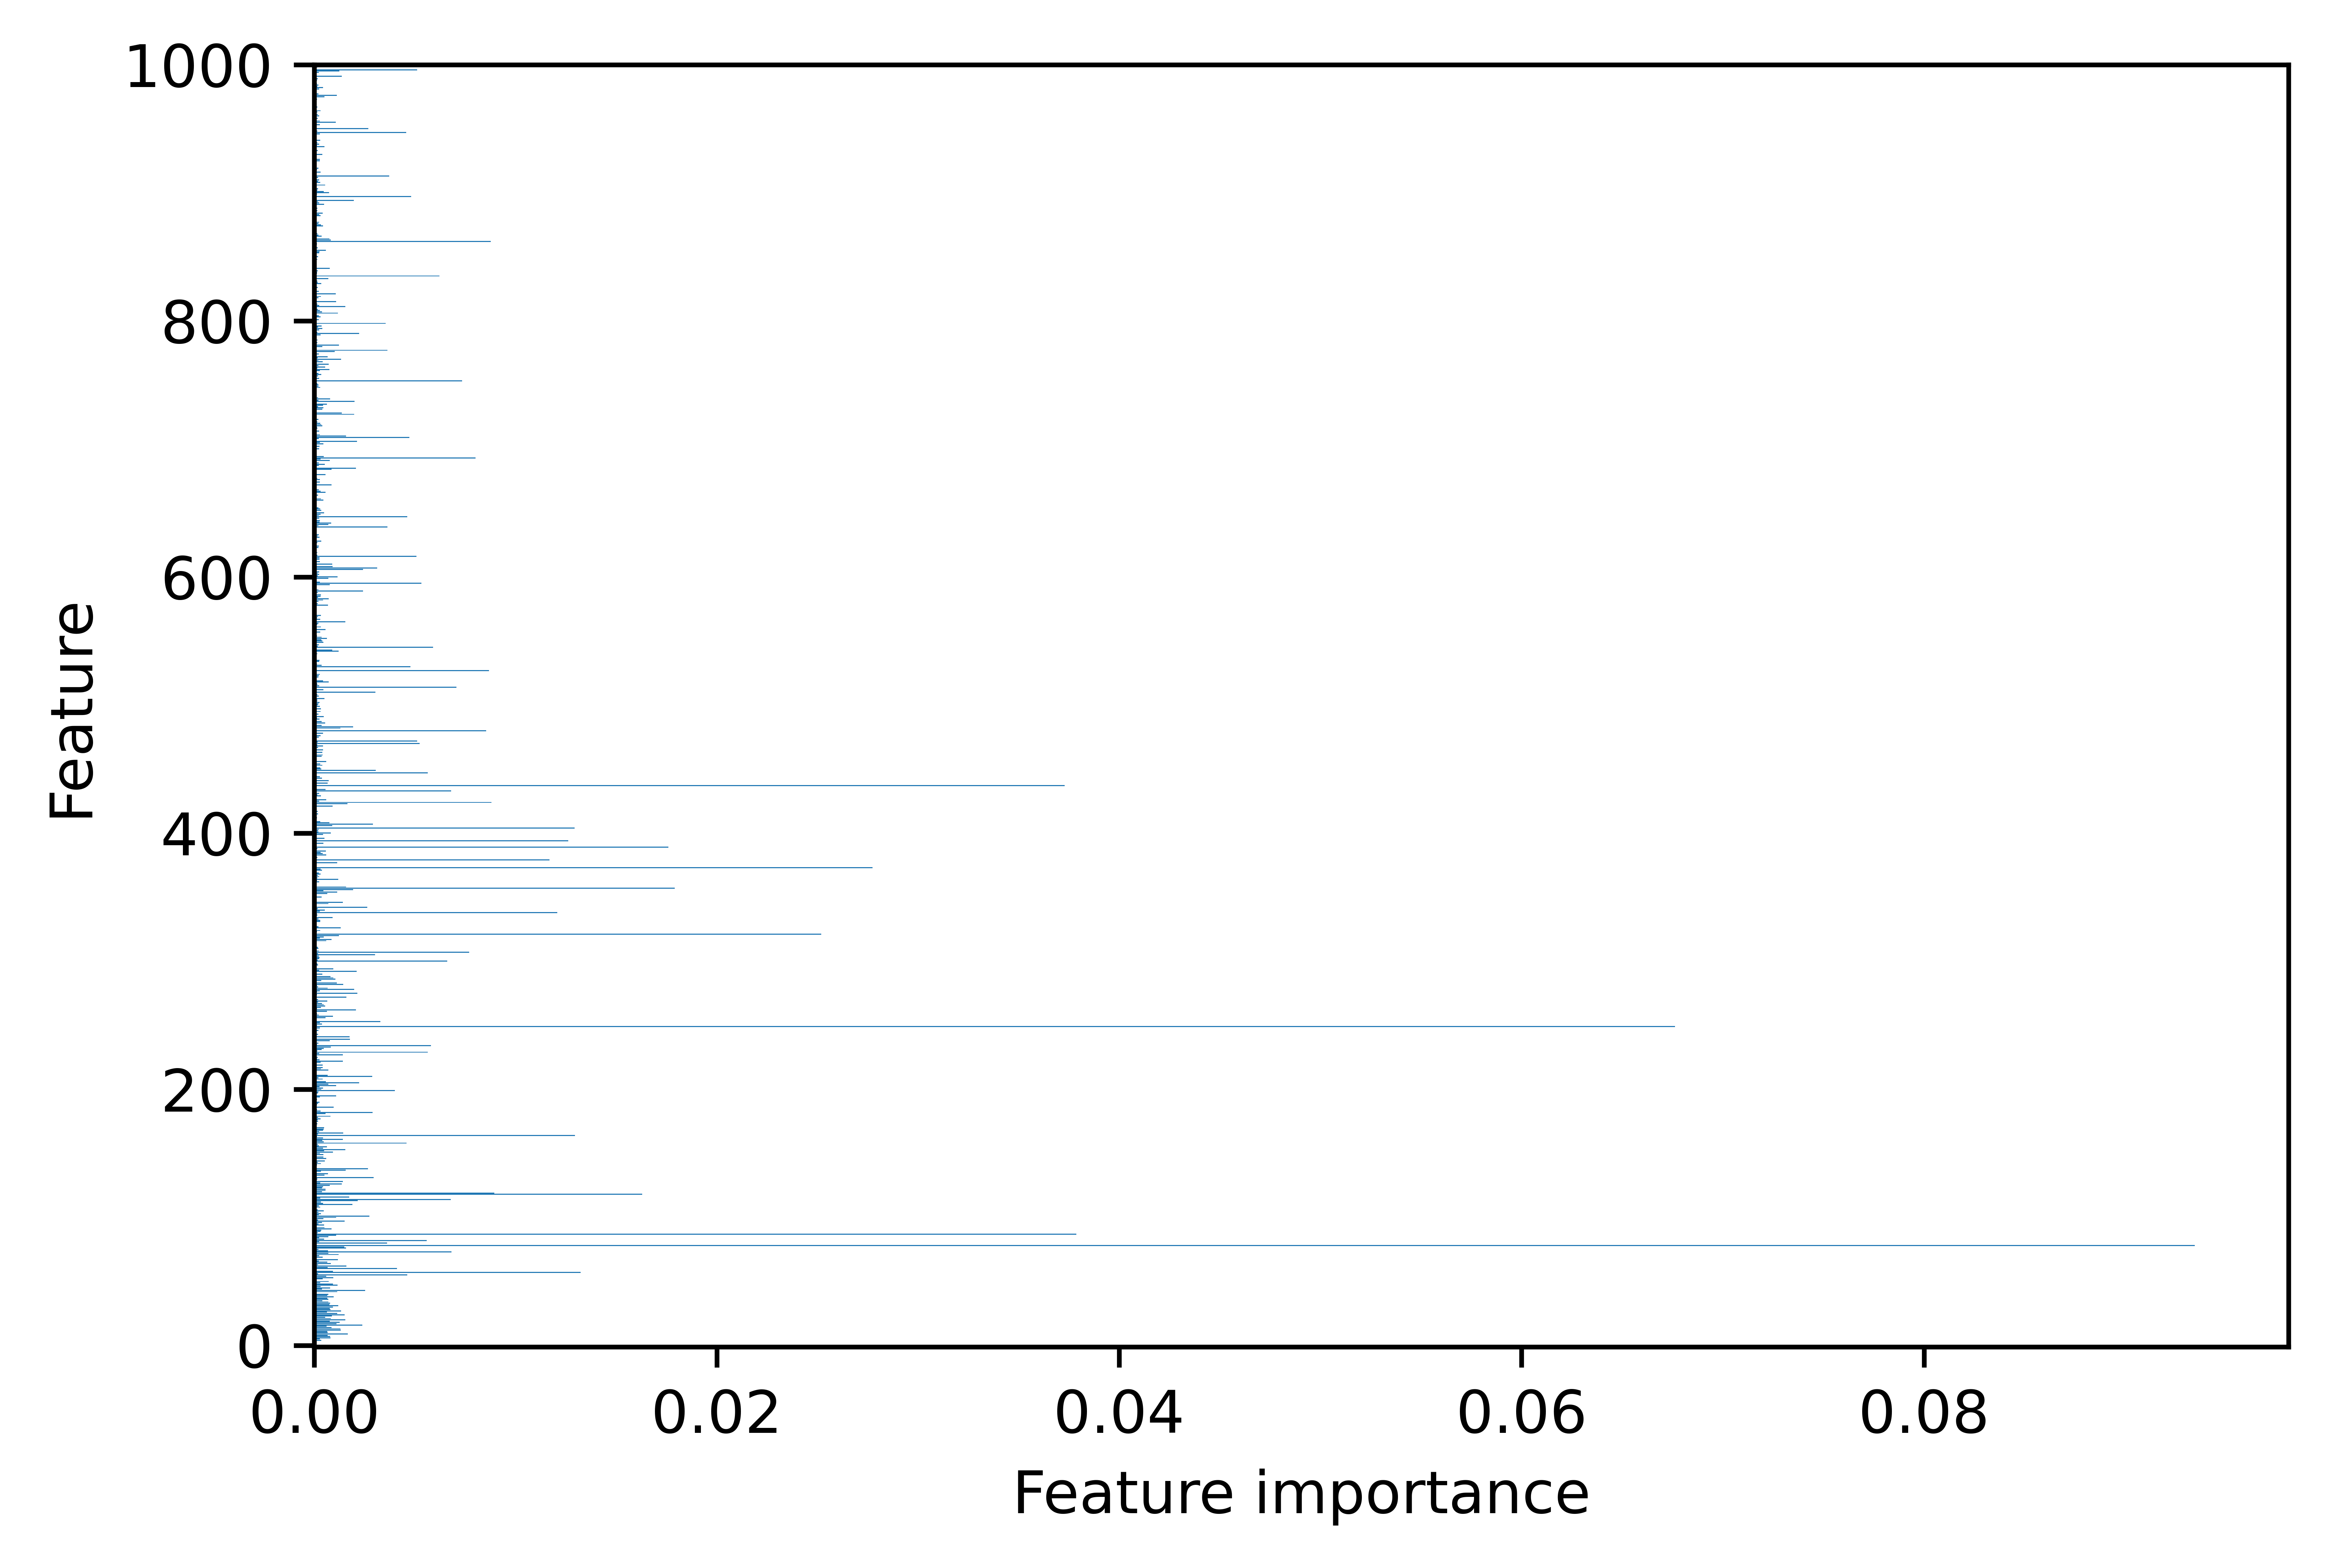

In [9]:
# Get GBC feature importance
n_features = X_train.shape[1]
plt.figure(dpi=1200)
plt.barh(range(n_features), clf.feature_importances_)
plt.xlabel ("Feature importance")
plt.ylabel("Feature") 
plt.ylim(-1, n_features)
fig1 = plt.gcf()
plt.show()
fig1.savefig('GradientBoostedFeatureImportance.jpg')

In [10]:
clf.feature_importances_.argsort()[-5:][::-1]

array([ 78, 249,  87, 437, 373], dtype=int64)

In [11]:
# Get misclassified samples from GBC
Y_pred = clf.predict(X_test)
misclassified_indices = np.where((Y_pred!=Y_test))[0]
k = 3
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X_train)
distances, indices = nn.kneighbors(X_test[misclassified_indices])

In [12]:
columns = ["Misclassified Test idx", "True Class", "Pred Class"]
for i in range(k):
    columns+= ["Neigbor#{}_idx".format(i+1), "Neigbor#{}_True Class".format(i+1), "Neigbor#{}_Distance".format(i+1)]

df = pd.DataFrame(columns = columns)

df["Misclassified Test idx"] = misclassified_indices
df["True Class"] =  Y_test[misclassified_indices]
df["Pred Class"] = Y_pred[misclassified_indices]
for i in range(k):
    df["Neigbor#{}_idx".format(i+1)] = indices[:,i]
    df["Neigbor#{}_True Class".format(i+1)] = Y_train[indices[:,i]]
    df["Neigbor#{}_Distance".format(i+1)] = np.around(distances[:,i], decimals=2)
df

,Misclassified Test idx,True Class,Pred Class,Neigbor#1_idx,Neigbor#1_True Class,Neigbor#1_Distance,Neigbor#2_idx,Neigbor#2_True Class,Neigbor#2_Distance,Neigbor#3_idx,Neigbor#3_True Class,Neigbor#3_Distance
0,2,0.0,1.0,5459,0.0,9.22,2176,1.0,9.27,10811,1.0,9.27
1,7,0.0,1.0,418,1.0,7.28,24990,1.0,7.35,4695,0.0,7.42
2,16,0.0,1.0,922,1.0,8.43,6225,1.0,8.43,23019,0.0,8.43
3,21,1.0,0.0,14532,0.0,6.86,17909,1.0,6.93,13878,0.0,7.00
4,25,0.0,1.0,9989,1.0,9.59,690,1.0,9.75,8003,1.0,9.75
...,...,...,...,...,...,...,...,...,...,...,...,...
3909,24926,0.0,1.0,1562,0.0,9.11,7969,1.0,9.11,12262,1.0,9.11
3910,24948,1.0,0.0,952,1.0,7.35,22526,0.0,7.35,708,1.0,7.55
3911,24965,0.0,1.0,418,1.0,6.16,4695,0.0,6.16,13878,0.0,6.16
3912,24980,1.0,0.0,13354,1.0,11.45,15970,1.0,11.45,2361,1.0,11.49


In [45]:
# Samples and their most prominent features for comparison
feature_array = clf.feature_importances_.argsort()[-10:][::-1]

neg_proba = clf.predict_proba(X_test)[::, 0]
pos_proba = clf.predict_proba(X_test)[::, 1]

print(neg_proba)
print(pos_proba)

print(feature_array)

print("negative sample features")
for i in neg_proba.argsort()[-10:][::-1]:
    print(i)
    for j in clf.feature_importances_.argsort()[-10:][::-1]:
        print(X_test[i, j], end=', ')
    print()
print("positive sample features")
for i in pos_proba.argsort()[-10:][::-1]:
    print(i)
    for j in clf.feature_importances_.argsort()[-10:][::-1]:
        print(X_test[i, j], end=', ')
    print()

[0.02489343 0.43605404 0.23190483 ... 0.79776541 0.86097057 0.62636623]
[0.97510657 0.56394596 0.76809517 ... 0.20223459 0.13902943 0.37363377]
[ 78 249  87 437 373 321 357 389 118  57]
negative sample features
10263
0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 
20907
1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 
7176
1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 
16725
1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 
10852
1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 
483
1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 
9462
0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 
4828
1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
23167
1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 
847
1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 
positive sample features
14275
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 
24853
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 
24841
0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 
14379
0.0, 0.0, 0.0, 0.0, 0.0,

In [39]:
for i in clf.feature_importances_.argsort()[-10:][::-1]:
        print(X_test[2, i], end=', ')

0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [50]:
for i in clf.feature_importances_.argsort()[-10:][::-1]:
        print(X_test[24980, i], end=', ')

0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 